<h1>Importation des packages</h1>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.mca import MCA #?POUR L ANALYSE FACTORILE SUR PYTHON

<h1>Importation et nettoyage des données</h1>

In [2]:
mall_data=pd.read_csv("newData3.csv",index_col="CustomerID")

In [3]:
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_grps,Spending_grps
CustomerID,,,,,,,
1,Male,19,15,39,[18-29],[15-37],[21-40]
2,Male,21,15,81,[18-29],[15-37],[81-100]
3,Female,20,16,6,[18-29],[15-37],[1-20]
4,Female,23,16,77,[18-29],[15-37],[61-80]
5,Female,31,17,40,[30-39],[15-37],[21-40]


In [4]:
mall_data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Age_group                 object
Income_grps               object
Spending_grps             object
dtype: object

In [5]:
mall_data.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_grps,Spending_grps
count,200,200.000000,200.000000,200.000000,200,200,200
unique,2,NaN,NaN,NaN,5,5,5
top,Female,NaN,NaN,NaN,[30-39],[61-83],[41-60]
freq,112,NaN,NaN,NaN,61,66,75
mean,NaN,38.850000,60.560000,50.200000,NaN,NaN,NaN
std,NaN,13.969007,26.264721,25.823522,NaN,NaN,NaN
min,NaN,18.000000,15.000000,1.000000,NaN,NaN,NaN
25%,NaN,28.750000,41.500000,34.750000,NaN,NaN,NaN
50%,NaN,36.000000,61.500000,50.000000,NaN,NaN,NaN
75%,NaN,49.000000,78.000000,73.000000,NaN,NaN,NaN


In [6]:
mall_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age_group                 0
Income_grps               0
Spending_grps             0
dtype: int64

In [7]:
# Vérifier les doublons
duplicates = mall_data.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")

Nombre de lignes dupliquées : 0


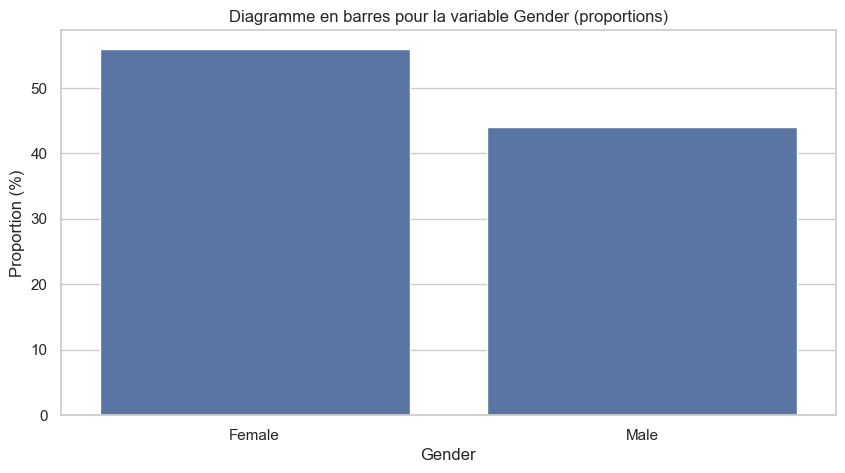

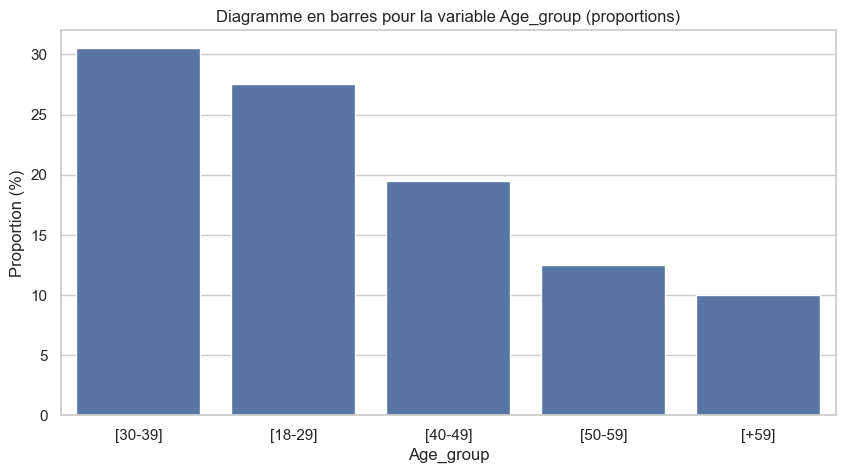

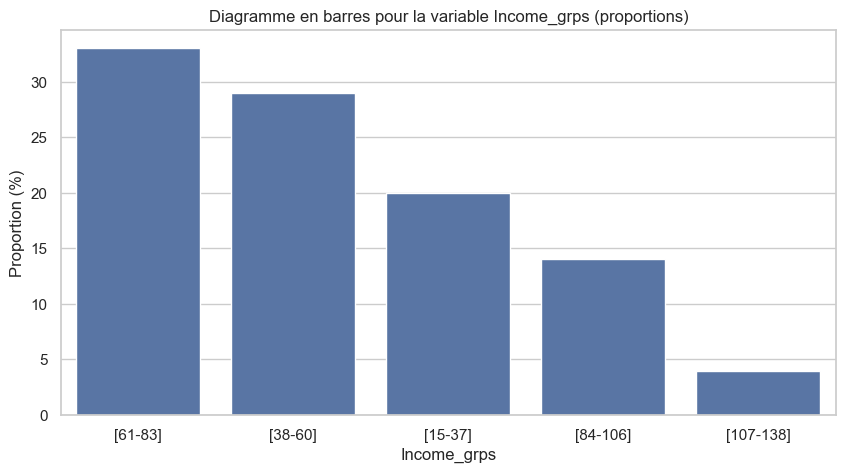

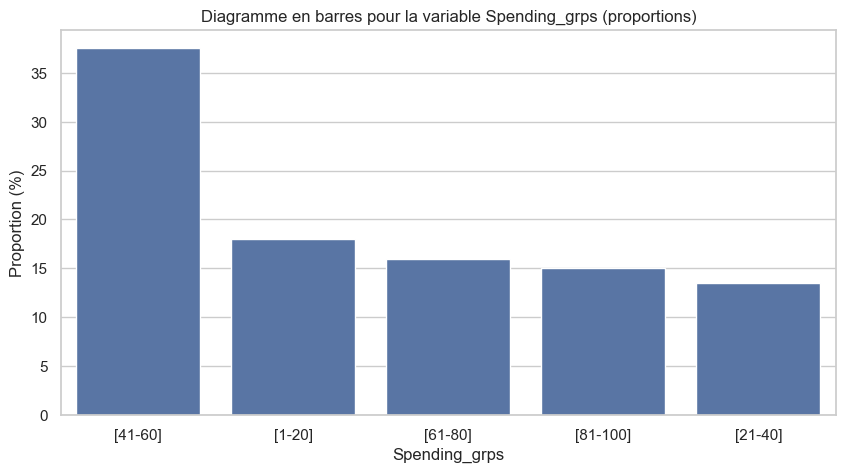

In [8]:
# Afficher les fréquences des variables catégorielles
# Liste des variables qualitatives
categorical_columns = ['Gender', 'Age_group', 'Income_grps', 'Spending_grps']


sns.set(style="whitegrid")
# Créer des graphiques pour les variables catégorielles en termes de proportion
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    proportions = mall_data[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    sns.color_palette()
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

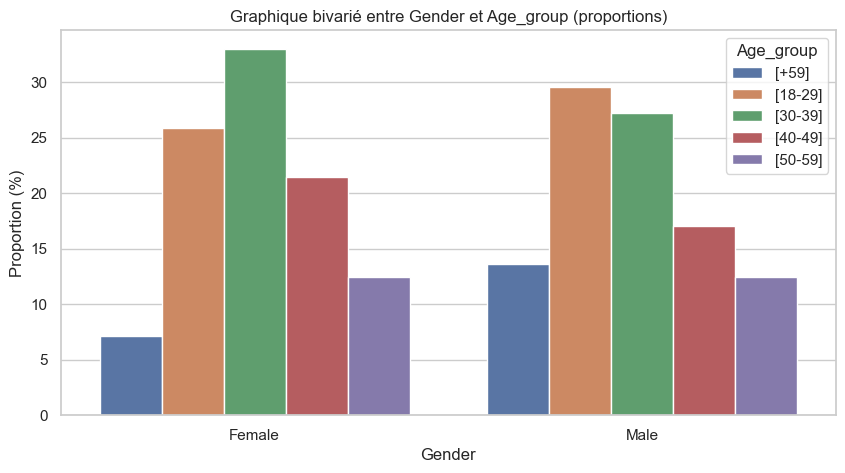

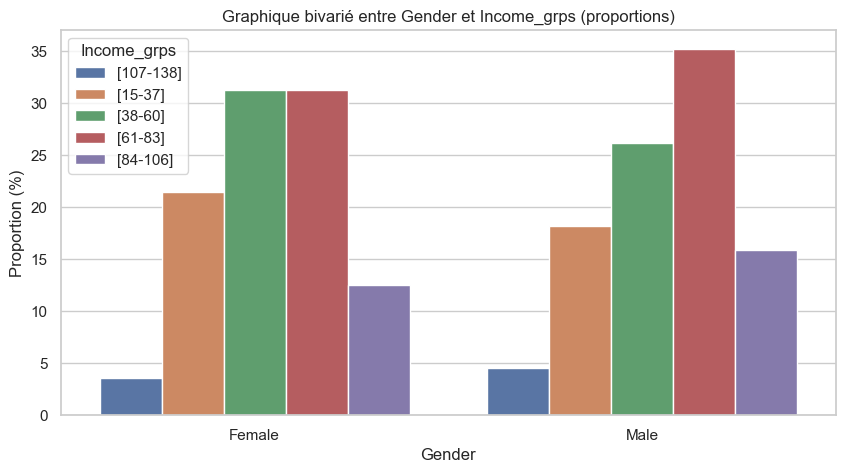

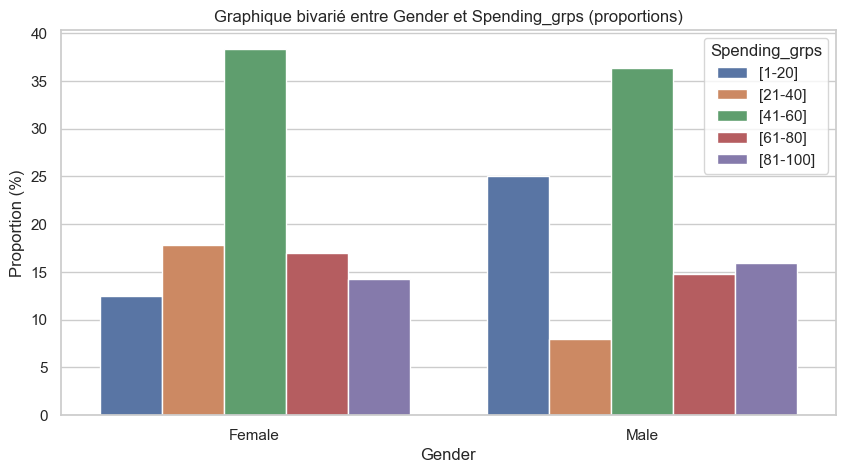

In [9]:
# Liste des variables qualitatives
categorical_columns = ['Gender', 'Age_group', 'Income_grps', 'Spending_grps']
# Créer des graphiques bivariés pour chaque paire de variables qualitatives
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2 and col1 =='Gender':
            # Calculer les proportions pour le graphique bivarié
            proportions = mall_data.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            # Créer un graphique en barres empilées pour la paire de variables
            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.show()

<h1>L'analyse des Correspondances Multiple</h1>

In [10]:
import fanalysis.mca as mca

# Liste des variables qualitatives
categorical_columns = ['Gender', 'Age_group', 'Income_grps', 'Spending_grps']
X = mall_data[categorical_columns].values

In [11]:
df=mall_data
# Créer une instance de la classe MCA
my_mca = mca.MCA(row_labels=df.index.values, var_labels=categorical_columns)

In [12]:
#analyse des relations entre les catégories des variables catégorielles et produit des résultats qui peuvent être explorés et interprétés.
my_mca.fit(X)

MCA(row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200], dtype=int64),
    var_labels=['Gender', 'Age_group', 'Income_grps', 'Spending_grps'])

In [13]:
# 1ère : les valeurs propres en valeur absolue
#2ème : pourcentage de l'inertie expliquée
#3ème : pourcentage cumulé de l'inertie expliquée
print(my_mca.eig_)

[[5.05392278e-01 3.58546942e-01 3.17387811e-01 2.99215807e-01
  2.76616685e-01 2.68380362e-01 2.37966091e-01 2.34431180e-01
  2.19896803e-01 1.98489759e-01 1.61172462e-01 1.11506821e-01
  6.09970000e-02]
 [1.55505316e+01 1.10322136e+01 9.76577879e+00 9.20664023e+00
  8.51128261e+00 8.25785729e+00 7.32203357e+00 7.21326706e+00
  6.76605547e+00 6.10737720e+00 4.95915268e+00 3.43097911e+00
  1.87683077e+00]
 [1.55505316e+01 2.65827452e+01 3.63485240e+01 4.55551642e+01
  5.40664468e+01 6.23243041e+01 6.96463377e+01 7.68596048e+01
  8.36256602e+01 8.97330374e+01 9.46921901e+01 9.81231692e+01
  1.00000000e+02]]


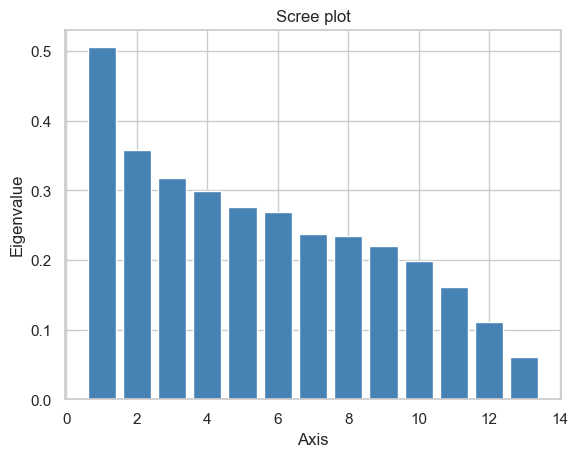

In [14]:
# Graphique des valeurs propres 

my_mca.plot_eigenvalues()

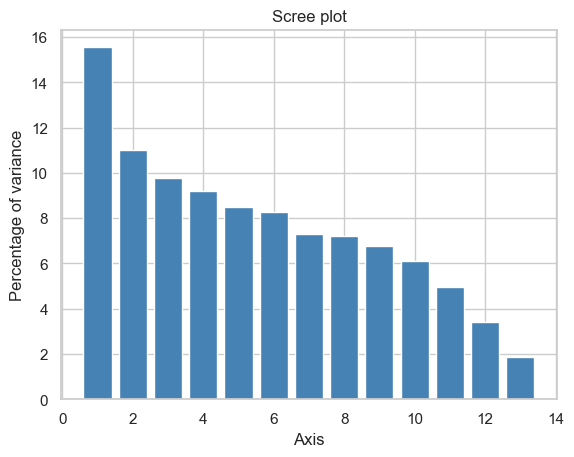

In [15]:
# Pourcentage de l'inertie expliqué
my_mca.plot_eigenvalues(type="percentage")

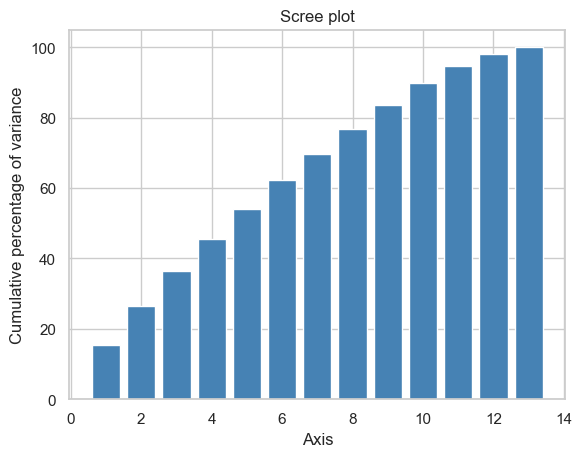

In [16]:
# Inertie expliquée cumulée
my_mca.plot_eigenvalues(type="cumulative")

<h1>Interprétation graphiques</h1>

<h3>Les individus</h3>

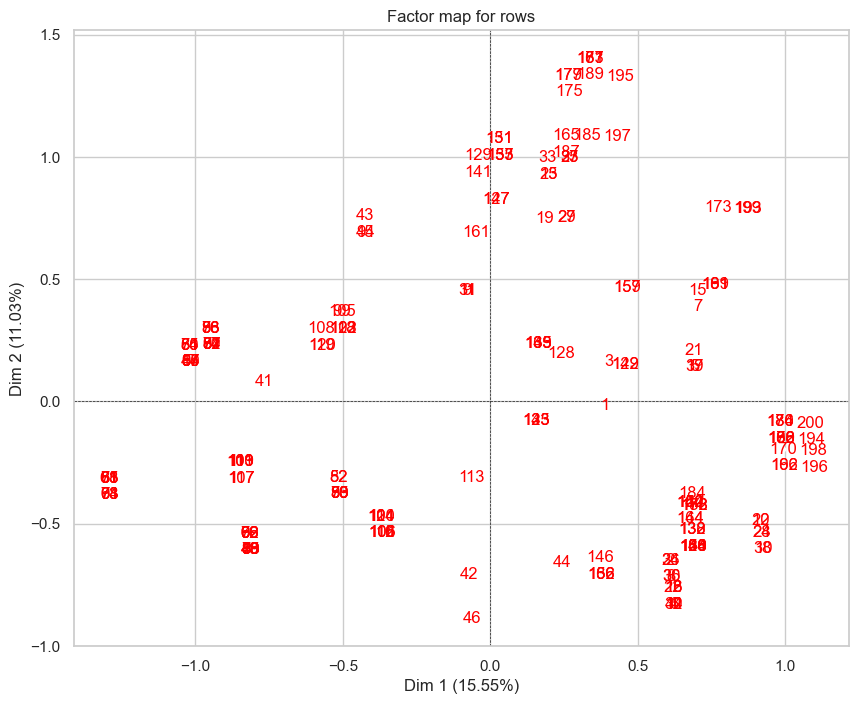

In [17]:
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,8))

<h1>Analyse de la qualité de représentation des Individus</h1>

In [18]:
#Extraction des statistiques des individus
df_rows = my_mca.row_topandas()
print(df_rows)

     row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
1          0.388146       -0.017448       -0.039536       -1.143292   
2          0.610597       -0.648139        0.706402       -0.630536   
3          0.400562        0.162190        0.404715       -1.189021   
4          0.621840       -0.827992       -0.119559       -1.144882   
5          0.692857        0.142714       -1.007028       -0.590990   
..              ...             ...             ...             ...   
196        1.095795       -0.268823       -0.508828        1.260419   
197        0.430483        1.084162       -1.106198        0.730004   
198        1.093199       -0.201816        0.149449        1.411706   
199        0.871921        0.788366        0.673724        1.367567   
200        1.084552       -0.088970        0.317134        1.774765   

     row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
1         -0.064997       -0.056869       -0.603674       -0.457753   
2    

In [19]:
# Coordonnées des individus
print(my_mca.row_coord_)

[[ 0.38814578 -0.01744834 -0.03953578 ...  0.02431119  0.25914231
  -0.18028772]
 [ 0.61059682 -0.64813862  0.70640216 ...  0.33059424 -0.27813674
  -0.04467105]
 [ 0.40056154  0.1621901   0.40471517 ... -0.44893762  0.59475909
  -0.05598075]
 ...
 [ 1.09319921 -0.20181611  0.14944914 ... -0.29859208 -0.41277369
  -0.06590998]
 [ 0.87192077  0.78836587  0.67372375 ... -0.4889997   0.52365262
  -0.10846662]
 [ 1.08455184 -0.08897013  0.31713361 ... -0.08424224 -0.33468621
  -0.07226762]]


<h3>Qualité de représentation</h3>

In [20]:
# Cos2 des individus
print(my_mca.row_cos2_)

[[4.20932948e-02 8.50612250e-05 4.36720835e-04 ... 1.65133726e-04
  1.87628946e-02 9.08145557e-03]
 [1.09851247e-01 1.23774652e-01 1.47027967e-01 ... 3.22022698e-02
  2.27935847e-02 5.87960573e-04]
 [5.35830555e-02 8.78491682e-03 5.47000771e-02 ... 6.73071143e-02
  1.18132976e-01 1.04656555e-03]
 ...
 [1.45735724e-01 4.96682710e-03 2.72366861e-03 ... 1.08723637e-02
  2.07774099e-02 5.29748476e-04]
 [9.47141134e-02 7.74312516e-02 5.65489263e-02 ... 2.97905036e-02
  3.41623091e-02 1.46572618e-03]
 [1.41640047e-01 9.53177823e-04 1.21107204e-02 ... 8.54565355e-04
  1.34884194e-02 6.28887427e-04]]


<h5>Premier axe</h5>

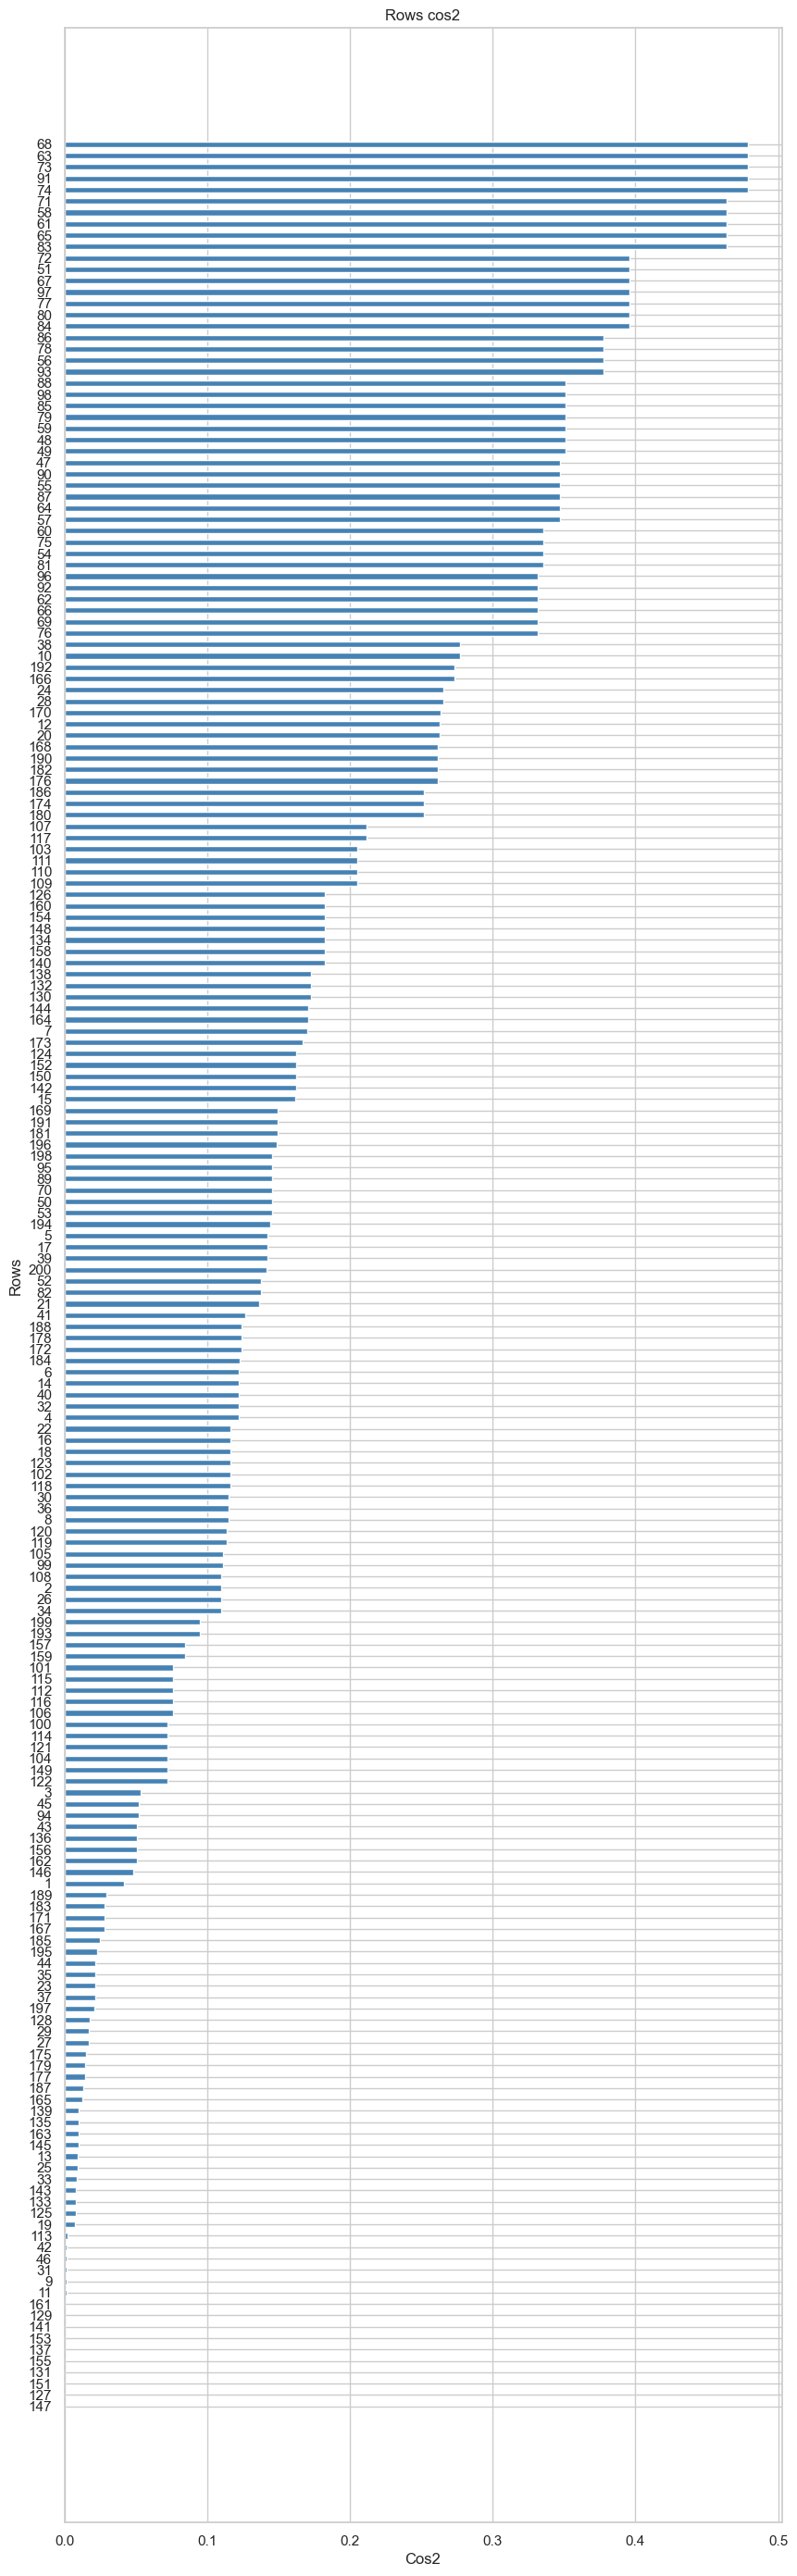

In [21]:
my_mca.plot_row_cos2(num_axis=1, figsize=(10,35))

<h5>Deuxieme axe</h5>

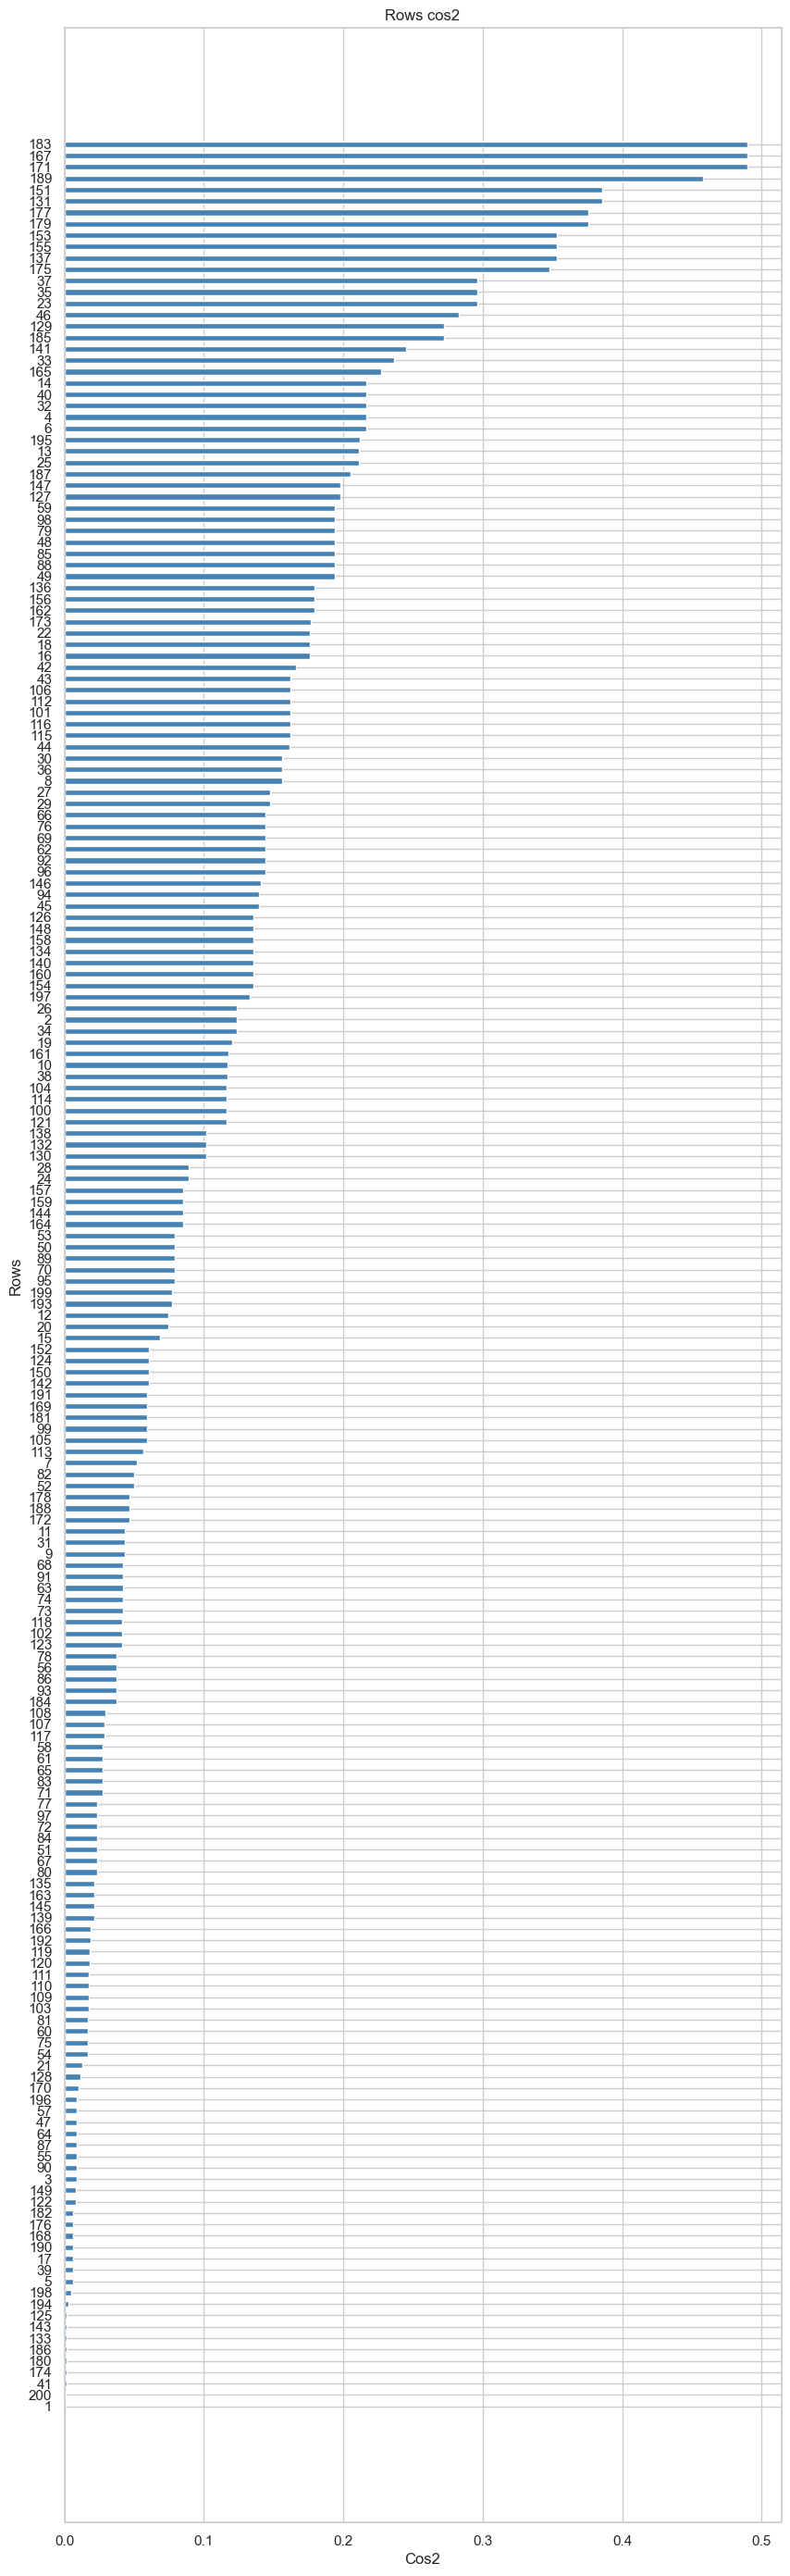

In [22]:
my_mca.plot_row_cos2(num_axis=2, figsize=(10,35))

<h3>Analyse des contributions</h3>

In [23]:
# Contributions des individus
print(my_mca.row_contrib_)

[[1.49049711e-01 4.24553504e-04 2.46241069e-03 ... 1.83354579e-03
  3.01123898e-01 2.66436553e-01]
 [3.68850584e-01 5.85814045e-01 7.86110862e-01 ... 3.39054670e-01
  3.46884810e-01 1.63573827e-02]
 [1.58737635e-01 3.66836604e-02 2.58035065e-01 ... 6.25246347e-01
  1.58617369e+00 2.56885146e-02]
 ...
 [1.18233358e+00 5.67983373e-02 3.51857347e-02 ... 2.76589528e-01
  7.63998622e-01 3.56093333e-02]
 [7.52134396e-01 8.66721581e-01 7.15061628e-01 ... 7.41816275e-01
  1.22957532e+00 9.64392277e-02]
 [1.16370267e+00 1.10385614e-02 1.58439808e-01 ... 2.20160303e-02
  5.02278048e-01 4.28103727e-02]]


<H1>Premier axe</H1>

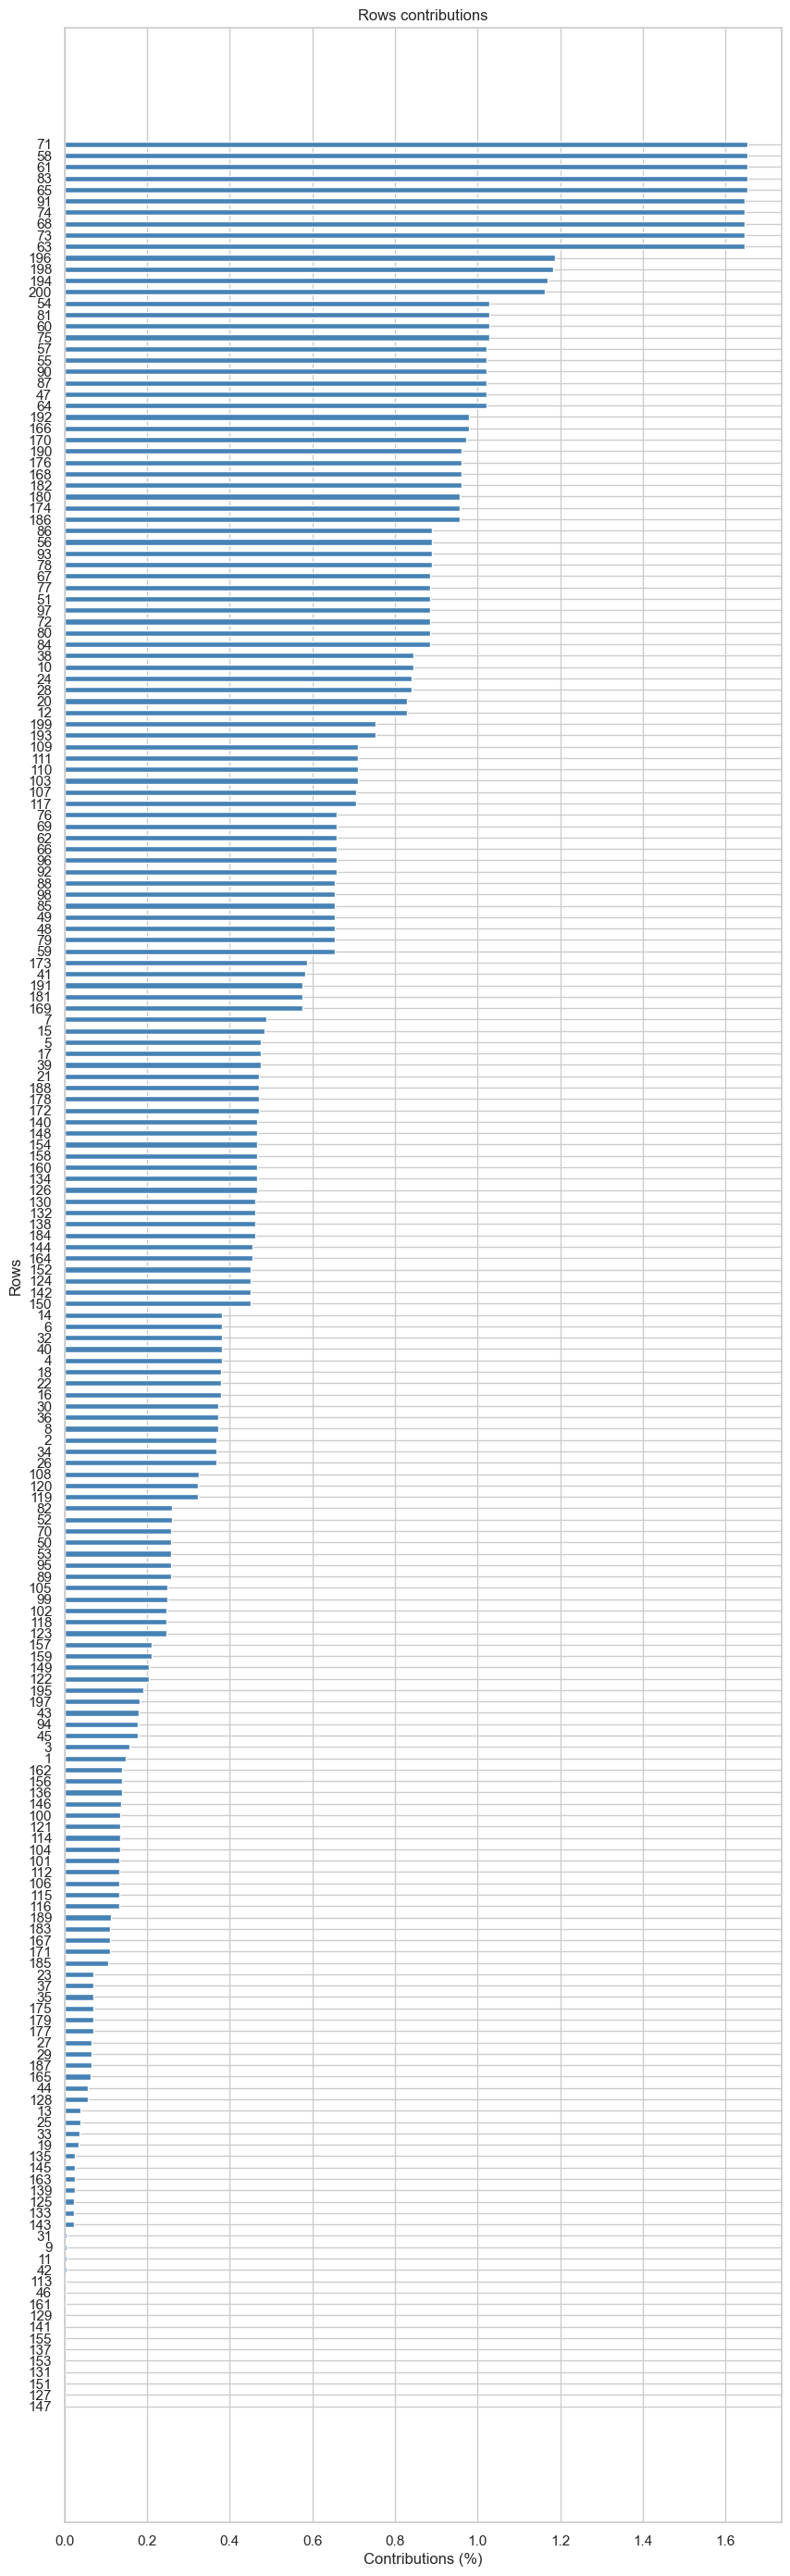

In [24]:
my_mca.plot_row_contrib(num_axis=1, figsize=(10,35))

<h5>Deuxieme axe</h5>

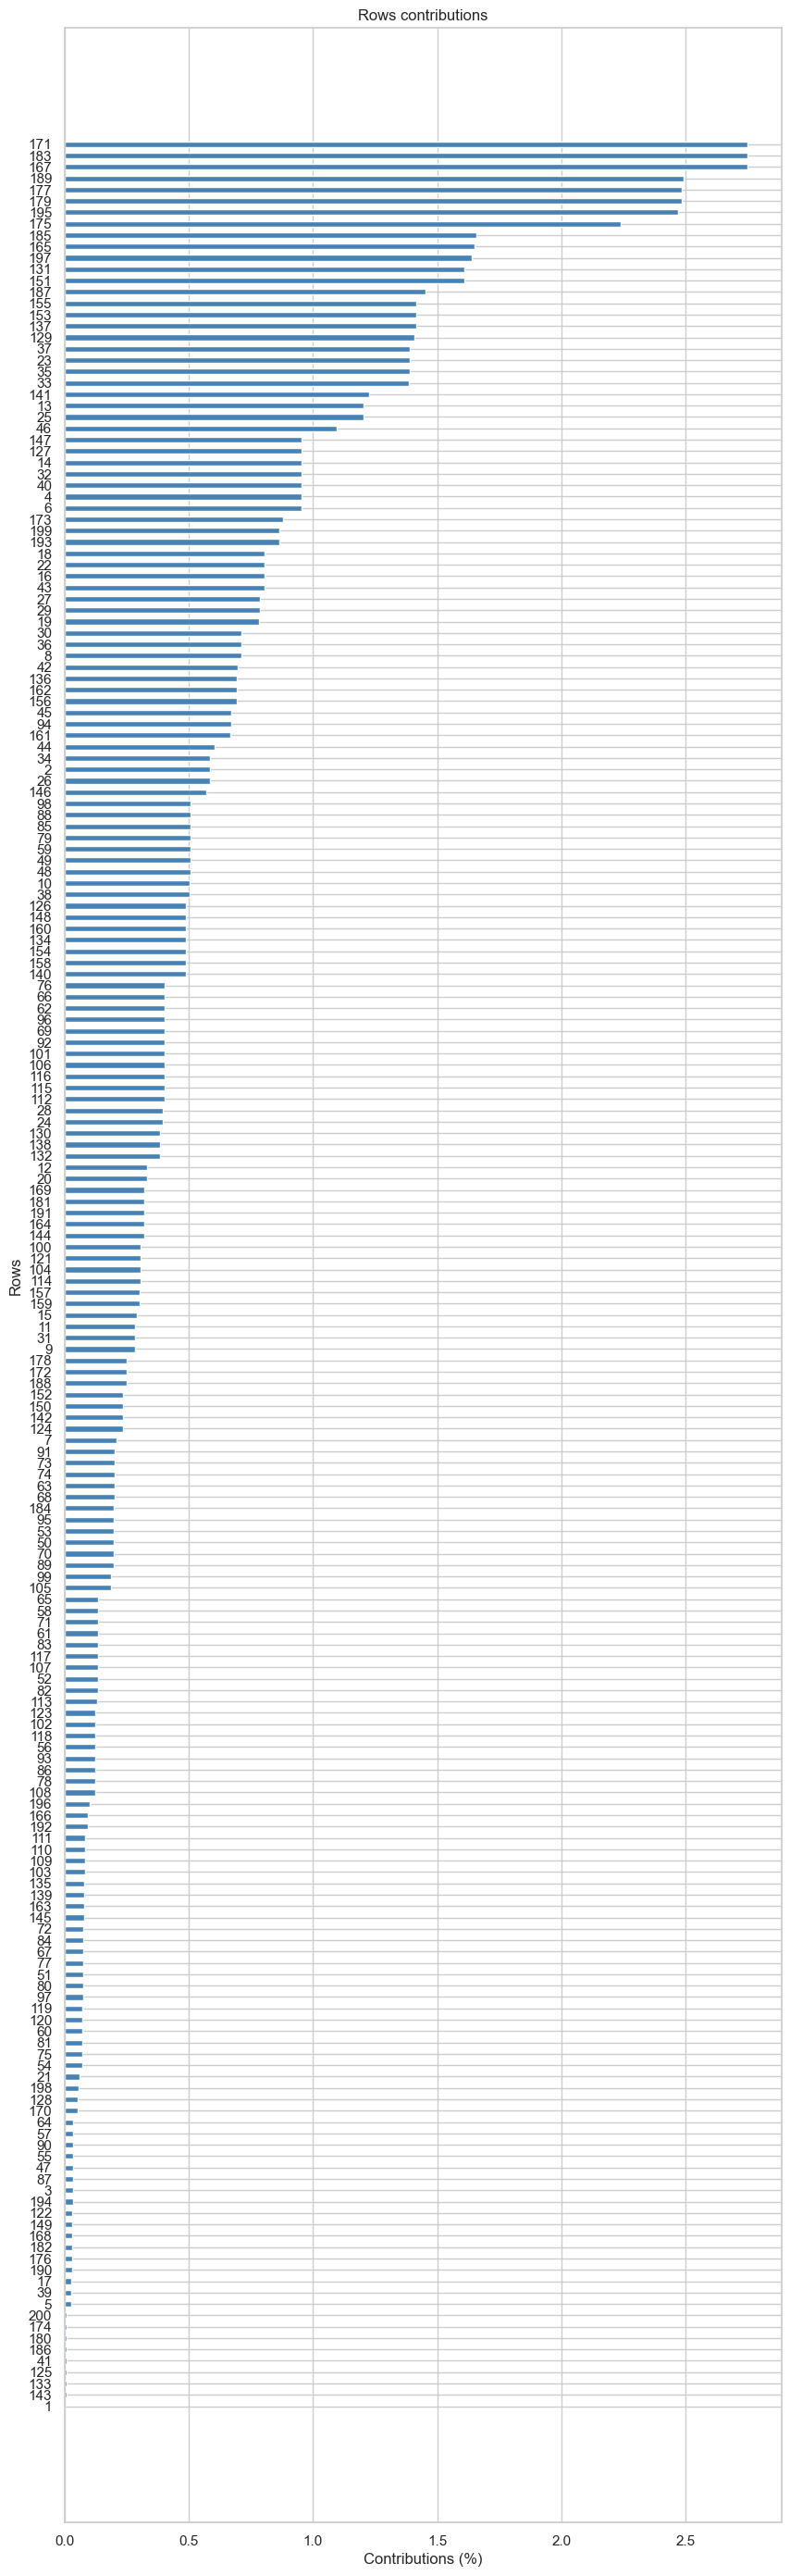

In [25]:
my_mca.plot_row_contrib(num_axis=2, figsize=(10,35))

<h1>Analyse de la qualité de représentation des Modalités</h1>

In [26]:
#Extraction des statistiques des modalités
df_cols=my_mca.col_topandas()
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim4,col_cos2_dim5,col_cos2_dim6,col_cos2_dim7,col_cos2_dim8,col_cos2_dim9,col_cos2_dim10,col_cos2_dim11,col_cos2_dim12,col_cos2_dim13
Gender_Female,0.003248,-0.070617,-0.652704,-0.145649,-0.077251,-0.031756,0.047890,0.135416,-0.211096,0.437035,...,0.026999,0.007595,0.001284,0.002919,0.023339,0.056714,2.430901e-01,0.089247,0.000093,0.000149
Gender_Male,-0.004134,0.089876,0.830715,0.185371,0.098319,0.040417,-0.060951,-0.172348,0.268667,-0.556226,...,0.026999,0.007595,0.001284,0.002919,0.023339,0.056714,2.430901e-01,0.089247,0.000093,0.000149
Age_group_[+59],-1.335493,-0.304919,0.769406,0.452315,-0.411721,0.745907,-0.538232,-1.944281,-0.589429,0.459921,...,0.022732,0.018835,0.061820,0.032188,0.420025,0.038603,2.350303e-02,0.078734,0.025860,0.003422
Age_group_[18-29],0.018965,-0.839964,0.359053,-0.787813,0.070809,-0.463668,-0.177222,0.485244,0.285953,-0.397909,...,0.235419,0.001902,0.081547,0.011913,0.089313,0.031016,6.005668e-02,0.151464,0.020503,0.000211
Age_group_[30-39],0.878071,-0.295857,-0.337759,0.751657,-0.004200,0.280624,0.188078,-0.212285,-0.156089,0.153635,...,0.247945,0.000008,0.034559,0.015524,0.019777,0.010692,1.035840e-02,0.100731,0.128872,0.004700
Age_group_[40-49],-0.356676,1.163866,-0.380837,-0.081363,-0.855911,-0.640432,-0.164482,0.141331,0.852740,0.287703,...,0.001604,0.177458,0.099354,0.006554,0.004839,0.176146,2.005062e-02,0.047084,0.072761,0.000073
Age_group_[50-59],-0.559408,0.998116,0.012797,-0.335779,1.519066,0.737697,0.618154,0.785388,-1.106969,-0.316223,...,0.016107,0.329652,0.077742,0.054588,0.088119,0.175054,1.428529e-02,0.006114,0.050203,0.001087
Income_grps_[107-138],1.226478,0.683905,-0.032352,2.369961,-2.243825,1.194744,-1.116292,1.952691,-0.938985,-1.418821,...,0.234030,0.209781,0.059476,0.051921,0.158875,0.036737,8.387725e-02,0.070237,0.009794,0.003062
Income_grps_[15-37],0.737827,-0.111281,0.148048,-1.353427,-0.266574,0.636909,-0.751876,-0.182244,-0.313579,0.197856,...,0.457941,0.017765,0.101413,0.141329,0.008303,0.024583,9.786749e-03,0.057321,0.002494,0.034390
Income_grps_[38-60],-1.202950,-0.251856,-0.363113,0.220019,0.139585,0.318672,-0.349321,0.260317,0.305626,-0.026054,...,0.019772,0.007958,0.041479,0.049841,0.027679,0.038152,2.772684e-04,0.028739,0.031163,0.084112


In [27]:
# Coordonnées des modalités
print(my_mca.col_coord_)

[[ 3.24785707e-03 -7.06167475e-02 -6.52704421e-01 -1.45648570e-01
  -7.72510038e-02 -3.17564603e-02  4.78899776e-02  1.35416352e-01
  -2.11095650e-01  4.37034697e-01 -2.64806112e-01  8.55529762e-03
   1.08188104e-02]
 [-4.13363627e-03  8.98758605e-02  8.30714717e-01  1.85370907e-01
   9.83194594e-02  4.04173131e-02 -6.09508806e-02 -1.72348084e-01
   2.68667191e-01 -5.56225978e-01  3.37025961e-01 -1.08885606e-02
  -1.37693950e-02]
 [-1.33549295e+00 -3.04918961e-01  7.69405612e-01  4.52314540e-01
  -4.11720715e-01  7.45907042e-01 -5.38232416e-01 -1.94428086e+00
  -5.89428721e-01  4.59920979e-01 -8.41787392e-01 -4.82427112e-01
   1.75501189e-01]
 [ 1.89654981e-02 -8.39963858e-01  3.59052912e-01 -7.87813301e-01
   7.08094955e-02 -4.63668340e-01 -1.77221634e-01  4.85243903e-01
   2.85952563e-01 -3.97908606e-01 -6.31914030e-01  2.32492334e-01
   2.35850168e-02]
 [ 8.78071016e-01 -2.95857220e-01 -3.37759158e-01  7.51657085e-01
  -4.20042836e-03  2.80624028e-01  1.88078460e-01 -2.12285357e-01


<H3>Représentation des modalités</H3>

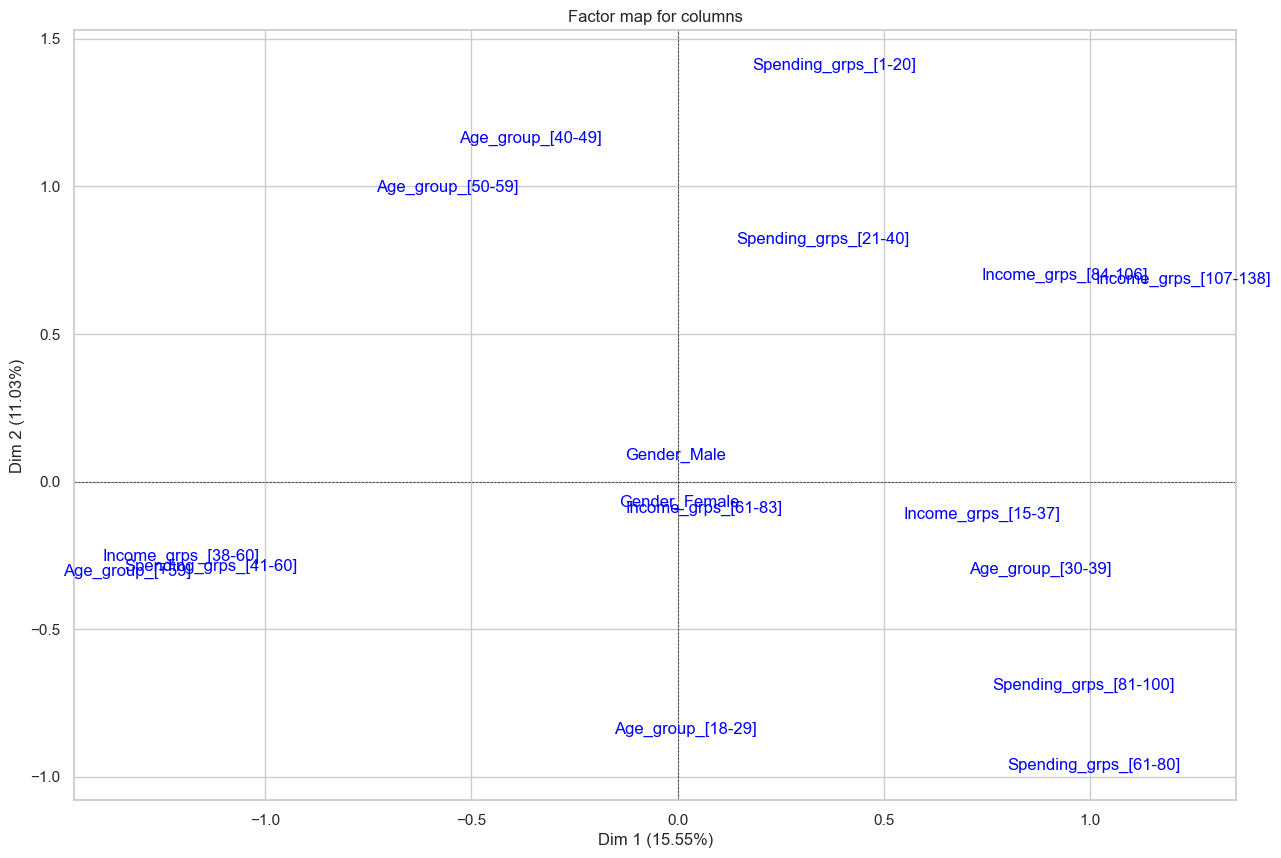

In [28]:
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(15,10),short_labels=False)

<h3>Qualité de représentation</h3>

In [29]:
# Cos2 des modalités
print(my_mca.col_cos2_)

[[1.34254598e-05 6.34674095e-03 5.42211168e-01 2.69990075e-02
  7.59527693e-03 1.28351080e-03 2.91893630e-03 2.33387489e-02
  5.67144754e-02 2.43090052e-01 8.92465342e-02 9.31548767e-05
  1.48968473e-04]
 [1.34254598e-05 6.34674095e-03 5.42211168e-01 2.69990075e-02
  7.59527693e-03 1.28351080e-03 2.91893630e-03 2.33387489e-02
  5.67144754e-02 2.43090052e-01 8.92465342e-02 9.31548767e-05
  1.48968473e-04]
 [1.98171268e-01 1.03306192e-02 6.57761106e-02 2.27320493e-02
  1.88348830e-02 6.18197017e-02 3.21882371e-02 4.20025339e-01
  3.86029130e-02 2.35030341e-02 7.87340014e-02 2.58595465e-02
  3.42229638e-03]
 [1.36434182e-04 2.67618348e-01 4.89003079e-02 2.35418889e-01
  1.90185625e-03 8.15472972e-02 1.19131925e-02 8.93130379e-02
  3.10157776e-02 6.00566842e-02 1.51464440e-01 2.05027427e-02
  2.10992524e-04]
 [3.38356340e-01 3.84131019e-02 5.00644330e-02 2.47944538e-01
  7.74287413e-06 3.45592845e-02 1.55236255e-02 1.97767586e-02
  1.06920293e-02 1.03584027e-02 1.00731209e-01 1.28872107e-0

<h5>Premier axe</h5>

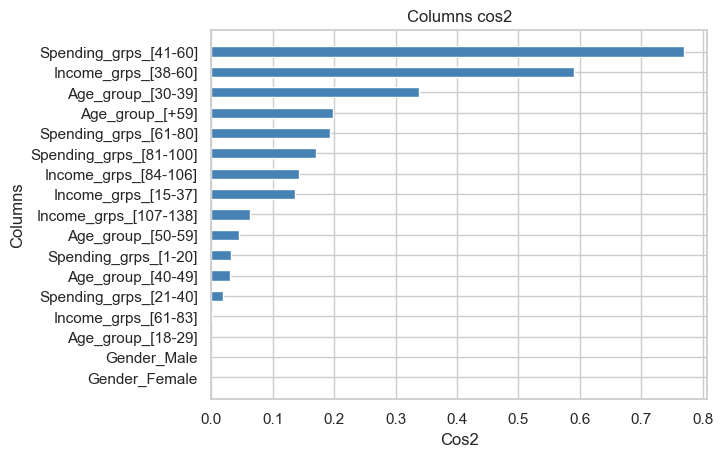

In [30]:
my_mca.plot_col_cos2(num_axis=1,short_labels=False)

<h5>Deuxieme axe</h5>

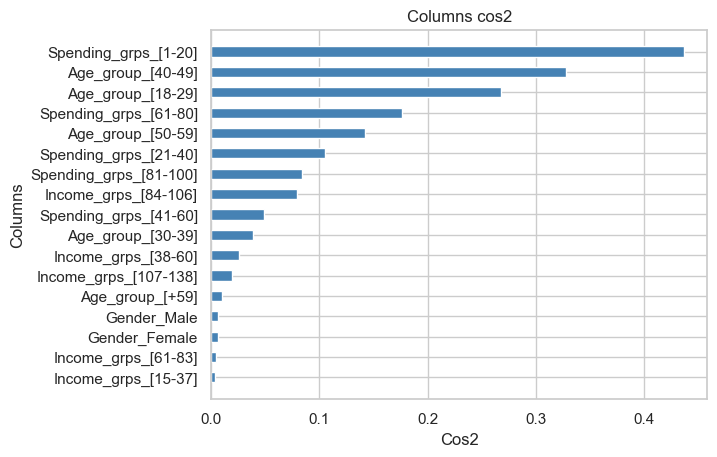

In [31]:
my_mca.plot_col_cos2(num_axis=2,short_labels=False)

<h3>Analyse des contributions</h3>

In [32]:
# Contributions des modalités
print(my_mca.col_contrib_)

[[2.92208773e-04 1.94714115e-01 1.87919090e+01 9.92558131e-01
  3.02035455e-01 5.26067505e-02 1.34928045e-01 1.09510279e+00
  2.83705457e+00 1.34716803e+01 6.09106459e+00 9.18960503e-03
  2.68644885e-02]
 [3.71902075e-04 2.47817965e-01 2.39169751e+01 1.26325580e+00
  3.84408761e-01 6.69540461e-02 1.71726602e-01 1.39376718e+00
  3.61079673e+00 1.71457749e+01 7.75226402e+00 1.16958609e-02
  3.41911672e-02]
 [8.82255969e+00 6.48280335e-01 4.66294684e+00 1.70937195e+00
  1.53202931e+00 5.18273124e+00 3.04343922e+00 4.03127696e+01
  3.94987799e+00 2.66420933e+00 1.09914250e+01 5.21797492e+00
  1.26238452e+00]
 [4.89297060e-03 1.35284450e+01 2.79253976e+00 1.42605011e+01
  1.24617011e-01 5.50727613e+00 9.07383963e-01 6.90521976e+00
  2.55647632e+00 5.48404818e+00 1.70332632e+01 3.33264107e+00
  6.26955343e-02]
 [1.16324322e+01 1.86147912e+00 2.74071497e+00 1.43977565e+01
  4.86349687e-04 2.23737521e+00 1.13345137e+00 1.46576570e+00
  8.44823605e-01 9.06733161e-01 1.08592047e+01 2.00808600e+0

<h5>Premier Axe</h5>

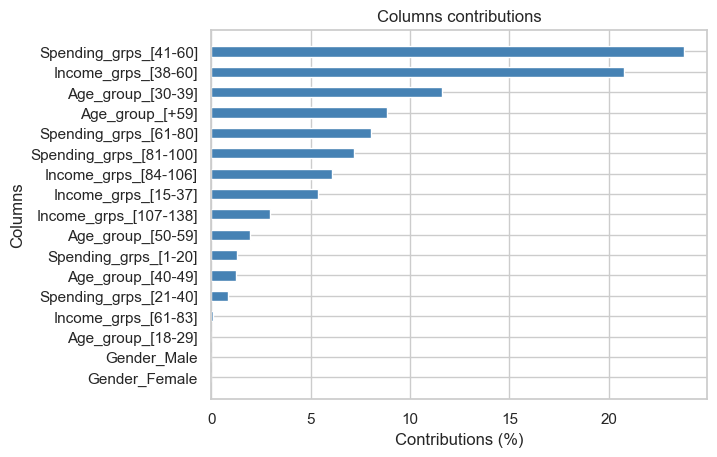

In [33]:
my_mca.plot_col_contrib(num_axis=1,short_labels=False)

<h5>Deuxieme Axe</h5>

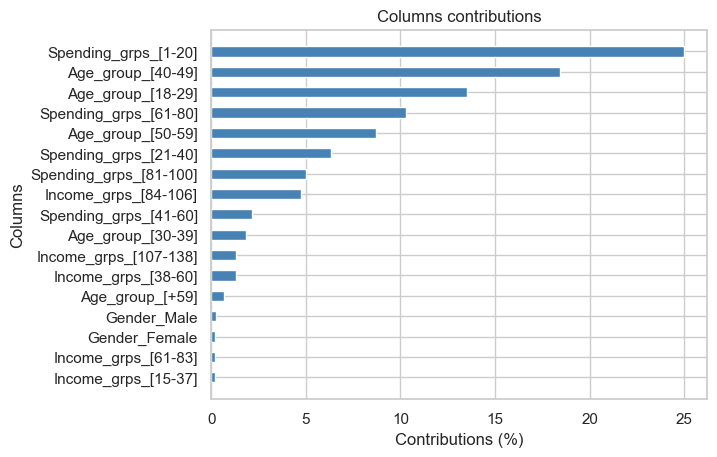

In [34]:
my_mca.plot_col_contrib(num_axis=2,short_labels=False)